In [165]:
#import module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [167]:
#Loading the dataset
bm_df = pd.read_csv('Dataset18-Bigmart_sales.csv')
bm_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [171]:
bm_df.shape

(8523, 12)

In [173]:
bm_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [179]:
bm_df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [181]:
bm_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [183]:
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [185]:
bm_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [187]:
#statistical info
bm_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [189]:
#Numerical and categorical list:
cat_cols = bm_df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [191]:
num_cols = bm_df.select_dtypes(exclude =['object']).columns.tolist()
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [193]:
#unique values in categorical cloumns:
# check unique values in dataset
bm_df[cat_cols].apply(lambda x: len(x.unique()))

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [195]:
for col in cat_cols:
    print(bm_df[col].value_counts())
    print("......................................................")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
......................................................
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
......................................................
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
......................................................
Outlet_I

In [197]:
# pre processing the dataset
bm_df.duplicated().any()

False

In [199]:
#check for null values
bm_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [201]:
bm_df[bm_df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [203]:
item_weight_mean = bm_df.groupby(['Item_Identifier'])["Item_Weight"].mean().reset_index()
item_weight_mean

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [205]:
item_dict = dict(zip(item_weight_mean.Item_Identifier.to_list(),item_weight_mean.Item_Weight.to_list()))
item_dict

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.800000000000002,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135000000000001,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.269999999999999,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.800000000000002,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,

In [207]:
for index, row in bm_df.iterrows():
    if(pd.isnull(row['Item_Weight'])):
        mean_value = item_dict[row['Item_Identifier']]
        bm_df['Item_Weight'][index] = mean_value

In [208]:
bm_df[bm_df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [211]:
item_list = bm_df['Outlet_Type'].unique()
mode_dict = {}
for item in item_list:
    try:
        df = bm_df[bm_df['Óutlet_Type'] == item]
        df_mode = df['Outlet_size'].mode()[0]
        mode_dict[item] = df_mode
    except Exception as e:
        pass

In [213]:
mode_dict

{}

In [215]:
for index, row in bm_df.iterrows():
    try:
        if(pd.isnull(row['Outlet_Size'])):
            mode_value = mode_dict[row['Outlet_Type']]
            bm_df['Outlet_Size'][index] = mode_value
    except Exception as e:
        pass

In [217]:
bm_df[bm_df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [219]:
bm_df[bm_df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [221]:
bm_df_cleaned = bm_df.dropna()

In [223]:
bm_df_cleaned.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [225]:
sum(bm_df_cleaned['Item_Visibility']==0)

382

In [227]:
#replace zero with mean
bm_df_cleaned.loc[:, 'Item_Visibility'].replace([0], bm_df_cleaned['Item_Visibility'].mean(), inplace=True)

In [229]:
sum(bm_df_cleaned['Item_Visibility']==0)

0

In [231]:
bm_df_cleaned['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3640
Regular    2073
LF          233
reg          82
low fat      81
Name: count, dtype: int64

In [233]:
#combine item fat content
bm_df_cleaned['Item_Fat_Content'] = bm_df_cleaned['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
bm_df_cleaned['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3954
Regular    2155
Name: count, dtype: int64

In [235]:
#creation of new attriburtes
bm_df_cleaned[['Item_Identifier']]

,Item_Identifier
0,FDA15
1,DRC01
2,FDN15
4,NCD19
5,FDP36
...,...
8517,FDF53
8518,FDF22
8520,NCJ29
8521,FDN46


In [258]:
bm_df_cleaned['New_Item_Type'] = bm_df_cleaned['Item_Identifier'].apply(lambda x: x[:2])
bm_df_cleaned['New_Item_Type']

0       FD
1       DR
2       FD
4       NC
5       FD
        ..
8517    FD
8518    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 6109, dtype: object

In [261]:
bm_df_cleaned['New_Item_Type'] = bm_df_cleaned['New_Item_Type'].map({'FD': 'Food', 'NC':'Non_consumable', 'DR':'Drinks'})
bm_df_cleaned['New_Item_Type'].value_counts()

New_Item_Type
Food              4407
Non_consumable    1139
Drinks             563
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

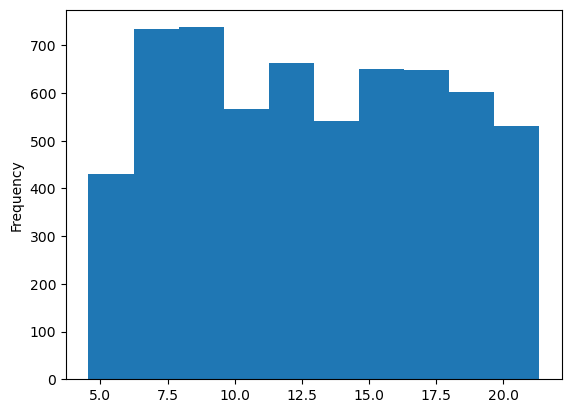

In [257]:
#Exploratory data analysis
bm_df_cleaned['Item_Weight'].plot(kind = 'hist')

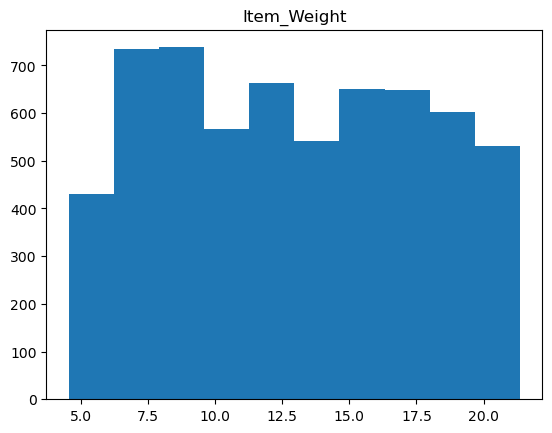

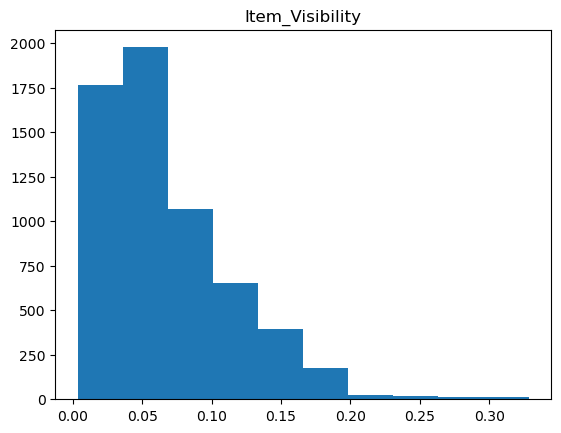

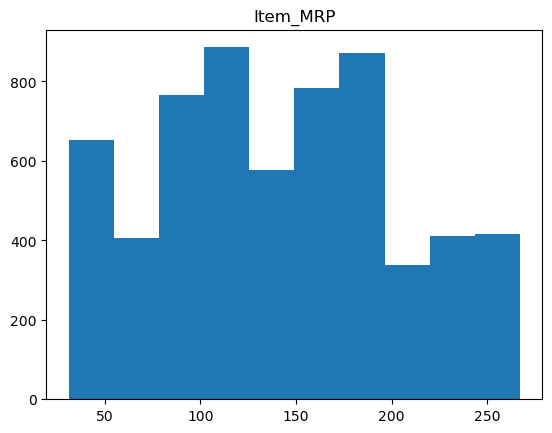

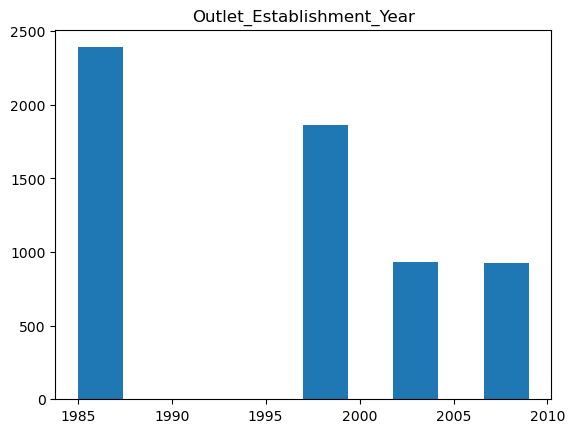

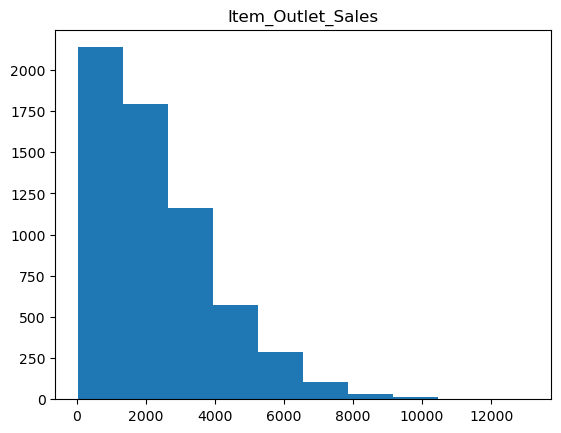

In [255]:
for col in num_cols:
    plt.hist(bm_df_cleaned[col])
    plt.title(col)
    plt.show()

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

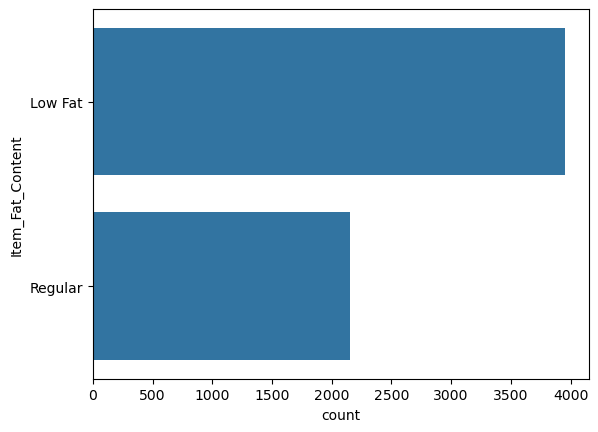

In [256]:
#visualize categorical columns:
sns.countplot(bm_df_cleaned["Item_Fat_Content"])

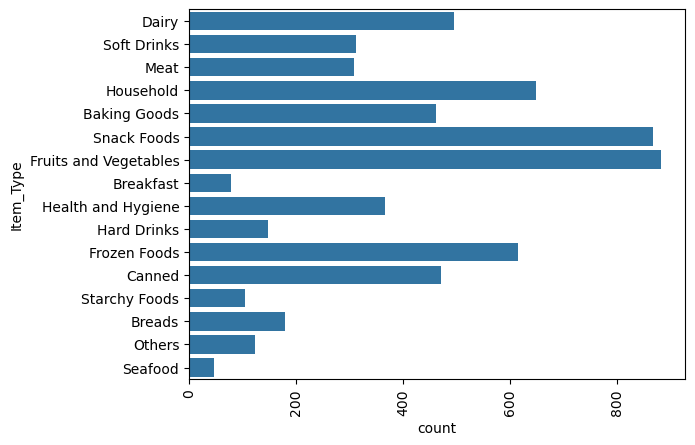

In [254]:
sns.countplot(bm_df_cleaned["Item_Type"])
plt.xticks(rotation = 90 )
plt.show()

<Axes: ylabel='count'>

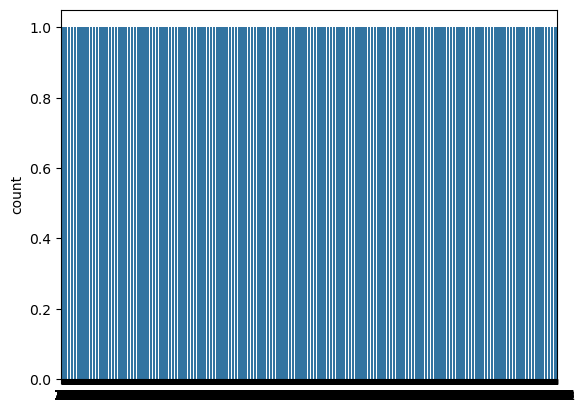

In [249]:
sns.countplot(bm_df_cleaned['Outlet_Establishment_Year'])

<Axes: xlabel='count', ylabel='Outlet_Size'>

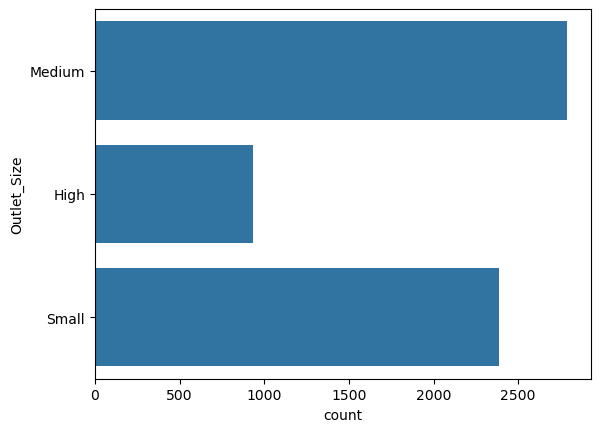

In [250]:
sns.countplot(bm_df_cleaned['Outlet_Size'])

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

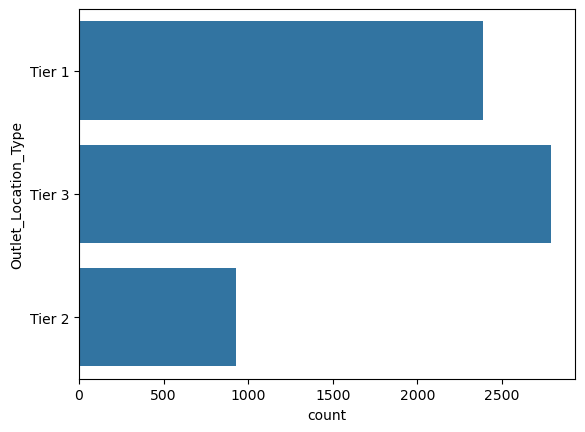

In [251]:
sns.countplot(bm_df_cleaned['Outlet_Location_Type'])

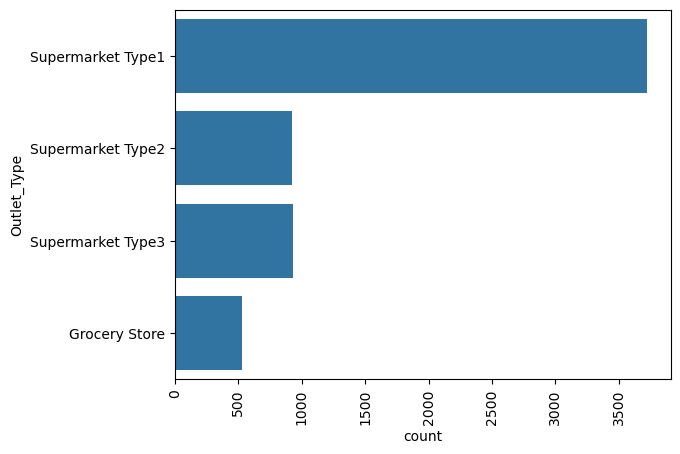

In [252]:
sns.countplot(bm_df_cleaned['Outlet_Type'])
plt.xticks(rotation = 90)
plt.show()

In [253]:
#correlation Matrix 
corr = bm_df_cleaned[num_cols].corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014795,0.030273,-0.010668,0.010175
Item_Visibility,-0.014795,1.000000,-0.005203,-0.090773,-0.112597
Item_MRP,0.030273,-0.005203,1.000000,0.011164,0.589227
Outlet_Establishment_Year,-0.010668,-0.090773,0.011164,1.000000,-0.057863
Item_Outlet_Sales,0.010175,-0.112597,0.589227,-0.057863,1.000000


<Axes: >

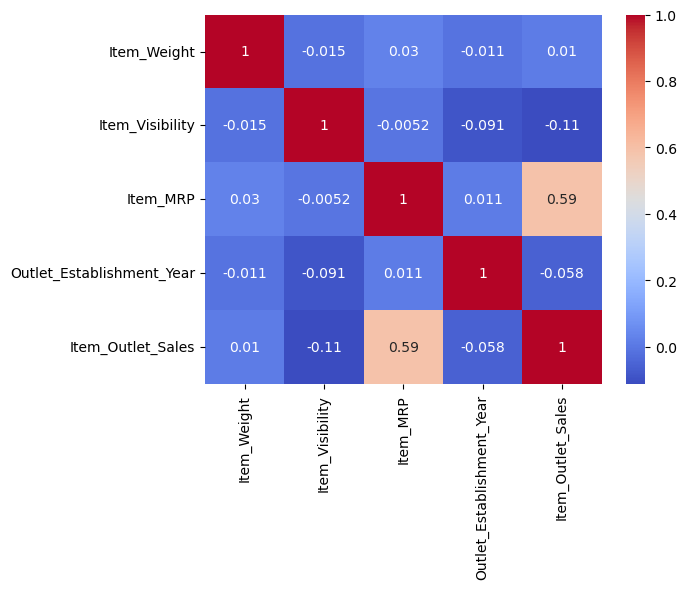

In [92]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

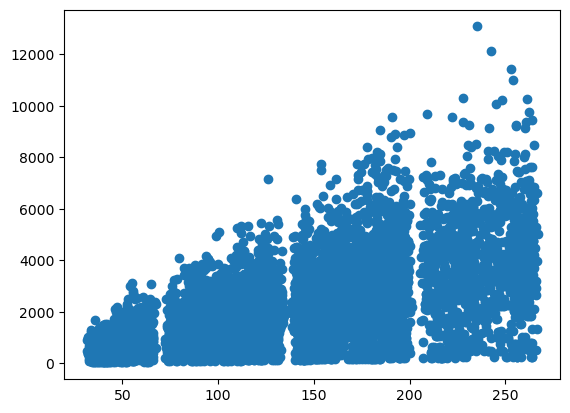

In [93]:
plt.scatter( bm_df_cleaned['Item_MRP'], bm_df_cleaned['Item_Outlet_Sales'])

In [271]:
bm_df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
4,NCD19,8.930,Low Fat,0.064477,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable
5,FDP36,10.395,Regular,0.064477,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food


In [ ]:
bm_df_cleaned = bm_df_cleaned.drop('Item_Identifier', axis = 1,)

In [299]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [301]:
cat_columns = ['Item_Fat_Content',
         'Item_Type',
               'Outlet_Identifier',
               'Outlet_Size',
               'Outlet_Location_Type',
               'Outlet_Type', 'New_Item_Type']
for col in cat_columns:
    bm_df_cleaned[col] = le.fit_transform(bm_df_cleaned[col])

In [303]:
bm_df_cleaned.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,9.300,0,0.016047,4,249.8092,6,1999,1,0,1,3735.1380,1
1,5.920,1,0.019278,14,48.2692,1,2009,1,2,2,443.4228,0
2,17.500,0,0.016760,10,141.6180,6,1999,1,0,1,2097.2700,1
4,8.930,0,0.064477,9,53.8614,0,1987,0,2,1,994.7052,2
5,10.395,1,0.064477,0,51.4008,1,2009,1,2,2,556.6088,1


In [305]:
#input split - target variable and predicator variable
x = bm_df_cleaned.drop(columns=['Item_Outlet_Sales'], axis = 1)
y = bm_df_cleaned['Item_Outlet_Sales']

In [307]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,9.300,0,0.016047,4,249.8092,6,1999,1,0,1,1
1,5.920,1,0.019278,14,48.2692,1,2009,1,2,2,0
2,17.500,0,0.016760,10,141.6180,6,1999,1,0,1,1
4,8.930,0,0.064477,9,53.8614,0,1987,0,2,1,2
5,10.395,1,0.064477,0,51.4008,1,2009,1,2,2,1


In [309]:
#future scaling:
feature_scaled = ['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']

In [311]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [313]:
for feature in feature_scaled:
    x[[feature]] = std_scaler.fit_transform(x[[feature]])

In [315]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,-0.774210,0,-1.110761,4,1.743805,6,0.361809,1,0,1,1
1,-1.498359,1,-1.042353,14,-1.494494,1,1.492970,1,2,2,0
2,0.982601,0,-1.095670,10,0.005414,6,0.361809,1,0,1,1
4,-0.853481,0,-0.085365,9,-1.404640,0,-0.995585,0,2,1,2
5,-0.539612,1,-0.085365,0,-1.444176,1,1.492970,1,2,2,1


In [317]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((4887, 11), (1222, 11))

In [319]:
#model development
#linnear regression
#random forest regressor

In [325]:
from sklearn.linear_model import LinearRegression

In [331]:
linear_reg_model = LinearRegression()

In [333]:
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [335]:
y_pred = linear_reg_model.predict(x_test)
y_pred

array([2846.52812756, 2887.39191118, 1703.6160999 , ...,  943.00467676,
       2203.86100395, 1759.04760303])

In [337]:
y_test

1584    1099.9016
3528    3872.9586
6603     958.7520
2228     969.4048
3997     591.2304
          ...    
1566    1342.2528
6041    2106.5912
1081     490.6946
8055    2852.2872
261     1418.1540
Name: Item_Outlet_Sales, Length: 1222, dtype: float64

In [339]:
from sklearn.metrics import r2_score, mean_squared_error

In [341]:
r2_score(y_test, y_pred)

0.5198781746258548

In [343]:
mean_squared_error(y_test, y_pred)

1409338.424536596

In [345]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(linear_reg_model, x, y, scoring='r2', cv=5)
cv_score

array([0.56458694, 0.5317616 , 0.53739196, 0.55168338, 0.55329978])

In [347]:
cv_score.mean()

0.5477447324221487

In [349]:
#linnear regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
y_pred_lr = linear_reg_model.predict(x_test)
score = round(r2_score(y_test, y_pred_lr)*100, 2)
mse = round(mean_squared_error(y_test, y_pred_lr), 2)
print("..............Linear Regressio Model...................")
print('R2_Squared = ', score, '%')
print('Mean Squared Error (MSE) = ', mse)

..............Linear Regressio Model...................
R2_Squared =  51.99 %
Mean Squared Error (MSE) =  1409338.42


In [357]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
score = round(r2_score(y_test, y_pred_rf)*100, 2)
mse = round(mean_squared_error(y_test, y_pred_rf),2)
print("............Random Forest Regressor............")
print('R2_Squared = ', score, '%')
print('Mean Squared Error (MSE) = ', mse)

............Random Forest Regressor............
R2_Squared =  52.36 %
Mean Squared Error (MSE) =  1398297.26


In [360]:
#best model - cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, x, y, scoring= 'r2', cv = 5)
scores

array([0.57188459, 0.52510657, 0.51958845, 0.54847847, 0.56082608])

In [361]:
print(f"Accuracy of the Model = {round(scores.mean()*100, 2)}%")

Accuracy of the Model = 54.52%


<Axes: title={'center': 'Feature Importance'}>

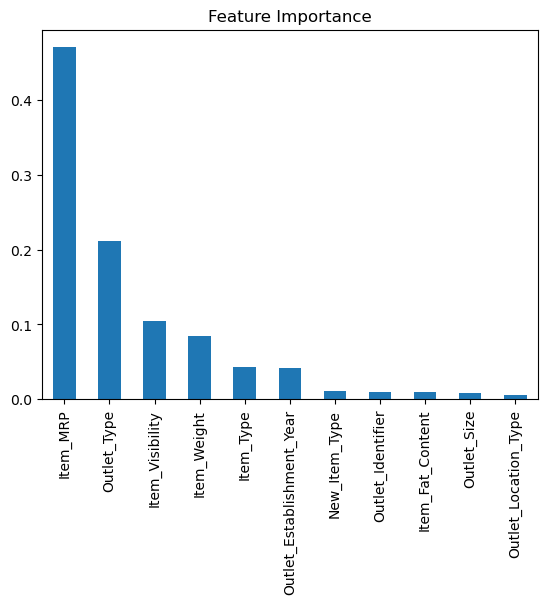

In [383]:
#feature importance 
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x,y)
coef = pd.Series(rf_model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [375]:
#model predective system
bm_df_cleaned.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'New_Item_Type'],
      dtype='object')

In [377]:
Item_Weight      = 9.41
Item_Fat_Content = 0
Item_Visibility  = 0.63
Item_Type        = 4
Item_MRP         = 253
Outlet_Identifier = 9
Outlet_Establishment_Year = 1997
Outlet_Size = 1
Outlet_Location_Type = 0
Outlet_Type = 1
New_Item_Type = 1

In [381]:
data = (9.41, 0, 0.63, 4, 253, 9, 1997, 1, 0, 1, 1)
data_arr = np.array(data)
data_reshape = data_arr.reshape(1, -1)
data_reshape

array([[9.410e+00, 0.000e+00, 6.300e-01, 4.000e+00, 2.530e+02, 9.000e+00,
        1.997e+03, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]])

In [385]:
#predict the sales of this product at specific outlet
predict = rf_model.predict(data_reshape)
print("Sales Predicition by Model = ", predict[0])

Sales Predicition by Model =  4766.681914000001
